<a href="https://colab.research.google.com/github/carpalmar/IA-FUNDAMENTALS/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Primero definimos la estructura básica de nuestro problema
class Item:
    """Clase para representar un item que puede ir en la mochila"""
    def __init__(self, peso: float, valor: float, nombre: str = None):
        self.peso = peso
        self.valor = valor
        self.nombre = nombre or f"Item({peso},{valor})"

    def __repr__(self):
        return self.nombre

In [3]:
# 2. Funciones auxiliares para evaluar soluciones
def calcular_peso_total(items, solucion):
    """Calcula el peso total de los items seleccionados"""
    return sum(item.peso for item, incluido in zip(items, solucion) if incluido)

def calcular_valor_total(items, solucion):
    """Calcula el valor total de los items seleccionados"""
    return sum(item.valor for item, incluido in zip(items, solucion) if incluido)

def evaluar_solucion(items, solucion, capacidad):
    """
    Evalúa una solución del problema de la mochila.
    Retorna 0 si la solución excede la capacidad.
    """
    peso_total = calcular_peso_total(items, solucion)
    if peso_total > capacidad:
        return 0
    return calcular_valor_total(items, solucion)

In [4]:
# 3. Funciones para generar soluciones
def generar_solucion_aleatoria(n_items):
    """Genera una solución aleatoria para n items"""
    import random
    return [random.random() < 0.5 for _ in range(n_items)]

def generar_vecino(solucion):
    """Genera un vecino cambiando un elemento aleatorio"""
    import random
    vecino = solucion.copy()
    idx = random.randrange(len(vecino))
    vecino[idx] = not vecino[idx]
    return vecino

In [5]:
# 4. Implementación de Hill Climbing
def hill_climbing(items, capacidad, max_iteraciones=1000):
    """
    Algoritmo Hill Climbing para el problema de la mochila

    Parámetros:
    - items: lista de Items
    - capacidad: capacidad máxima de la mochila
    - max_iteraciones: número máximo de iteraciones

    Retorna:
    - mejor solución encontrada
    - valor de la mejor solución
    - historia de valores para visualización
    """
    # Generar solución inicial
    actual = generar_solucion_aleatoria(len(items))
    valor_actual = evaluar_solucion(items, actual, capacidad)
    historia = [(0, valor_actual)]

    # Iteración principal
    for i in range(1, max_iteraciones + 1):
        # Generar y evaluar vecino
        vecino = generar_vecino(actual)
        valor_vecino = evaluar_solucion(items, vecino, capacidad)

        # Si el vecino es mejor, movernos a él
        if valor_vecino > valor_actual:
            actual = vecino
            valor_actual = valor_vecino

        historia.append((i, valor_actual))

    return actual, valor_actual, historia

In [6]:
# 5. Implementación de Simulated Annealing
def simulated_annealing(items, capacidad, max_iteraciones=1000, temp_inicial=100.0,
                       tasa_enfriamiento=0.95):
    """
    Algoritmo Simulated Annealing para el problema de la mochila

    Parámetros:
    - items: lista de Items
    - capacidad: capacidad máxima de la mochila
    - max_iteraciones: número máximo de iteraciones
    - temp_inicial: temperatura inicial
    - tasa_enfriamiento: tasa de enfriamiento por iteración

    Retorna:
    - mejor solución encontrada
    - valor de la mejor solución
    - historia de valores para visualización
    """
    import random
    import numpy as np

    # Generar solución inicial
    actual = generar_solucion_aleatoria(len(items))
    valor_actual = evaluar_solucion(items, actual, capacidad)
    mejor = actual.copy()
    mejor_valor = valor_actual
    temp = temp_inicial
    historia = [(0, valor_actual)]

    # Iteración principal
    for i in range(1, max_iteraciones + 1):
        # Generar y evaluar vecino
        vecino = generar_vecino(actual)
        valor_vecino = evaluar_solucion(items, vecino, capacidad)

        # Calcular delta y decidir si aceptar la nueva solución
        delta = valor_vecino - valor_actual
        if delta > 0 or random.random() < np.exp(delta / temp):
            actual = vecino
            valor_actual = valor_vecino

            # Actualizar la mejor solución si corresponde
            if valor_actual > mejor_valor:
                mejor = actual.copy()
                mejor_valor = valor_actual

        # Enfriar temperatura
        temp *= tasa_enfriamiento
        historia.append((i, valor_actual))

    return mejor, mejor_valor, historia

In [7]:
# 6. Funciones de visualización
def visualizar_comparacion(resultados_hc, resultados_sa, titulo="Comparación de Algoritmos"):
    """
    Crea una gráfica comparativa de Hill Climbing y Simulated Annealing
    """
    import matplotlib.pyplot as plt

    # Crear figura
    plt.figure(figsize=(12, 6))

    # Extraer datos para la gráfica
    iteraciones_hc, valores_hc = zip(*resultados_hc[2])  # La historia está en el tercer elemento
    iteraciones_sa, valores_sa = zip(*resultados_sa[2])

    # Graficar las líneas
    plt.plot(iteraciones_hc, valores_hc, label='Hill Climbing', color='blue')
    plt.plot(iteraciones_sa, valores_sa, label='Simulated Annealing', color='green')

    # Configurar la gráfica
    plt.title(titulo)
    plt.xlabel('Iteraciones')
    plt.ylabel('Valor')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Mostrar los mejores valores encontrados
    plt.axhline(y=resultados_hc[1], color='blue', linestyle='--', alpha=0.3)
    plt.axhline(y=resultados_sa[1], color='green', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

In [8]:
# 7. Función para mostrar resultados
def mostrar_resultados(items, solucion, valor, algoritmo=""):
    """Muestra los resultados de manera formateada"""
    print(f"\nResultados {algoritmo}:")
    print(f"Valor total: {valor}")
    print("Items seleccionados:")
    for item, incluido in zip(items, solucion):
        if incluido:
            print(f"- {item.nombre}: peso={item.peso}, valor={item.valor}")

In [9]:
# 8. Ejemplo de uso
def ejecutar_ejemplo():
    # Crear items de ejemplo
    items_ejemplo = [
        Item(2, 3, "Libro"),
        Item(3, 4, "Laptop"),
        Item(4, 5, "Cámara"),
        Item(5, 6, "Teléfono"),
        Item(6, 7, "Tablet"),
        Item(7, 8, "Consola"),
        Item(8, 9, "Proyector"),
        Item(9, 10, "Impresora")
    ]
    capacidad_mochila = 20

    # Ejecutar Hill Climbing
    print("\nEjecutando Hill Climbing...")
    resultados_hc = hill_climbing(items_ejemplo, capacidad_mochila, max_iteraciones=100)

    # Ejecutar Simulated Annealing
    print("Ejecutando Simulated Annealing...")
    resultados_sa = simulated_annealing(
        items_ejemplo,
        capacidad_mochila,
        max_iteraciones=100,
        temp_inicial=100.0,
        tasa_enfriamiento=0.95
    )

    # Mostrar resultados
    mostrar_resultados(items_ejemplo, resultados_hc[0], resultados_hc[1], "Hill Climbing")
    mostrar_resultados(items_ejemplo, resultados_sa[0], resultados_sa[1], "Simulated Annealing")

    # Crear visualización
    visualizar_comparacion(resultados_hc, resultados_sa)


Ejecutando Hill Climbing...
Ejecutando Simulated Annealing...

Resultados Hill Climbing:
Valor total: 23
Items seleccionados:
- Laptop: peso=3, valor=4
- Cámara: peso=4, valor=5
- Teléfono: peso=5, valor=6
- Consola: peso=7, valor=8

Resultados Simulated Annealing:
Valor total: 25
Items seleccionados:
- Libro: peso=2, valor=3
- Laptop: peso=3, valor=4
- Cámara: peso=4, valor=5
- Teléfono: peso=5, valor=6
- Tablet: peso=6, valor=7


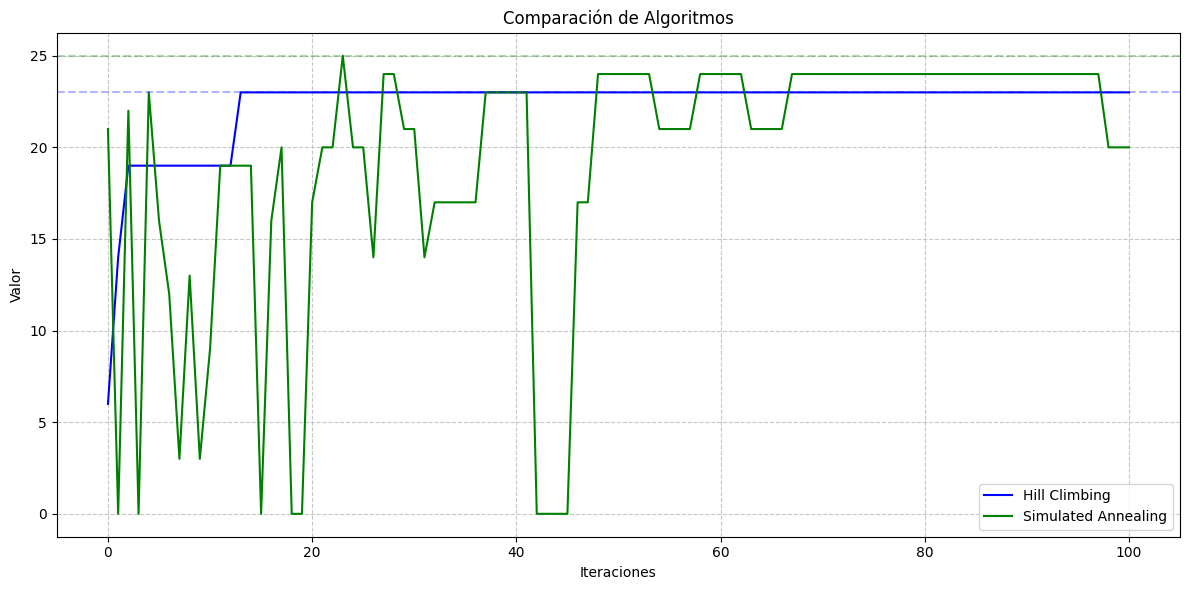

In [10]:
if __name__ == "__main__":
    ejecutar_ejemplo()